In [1]:
!pip install tensorflow-ranking==0.5.0
!pip install tensorflow==2.9.1
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 756.2 kB/s eta 0:00:000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 74.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 57.7 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 49.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Unins

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorFlow version: 2.9.1


**Importing  libraries**

In [2]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall, AUC
from tensorflow_addons.metrics import F1Score
print("TensorFlow version:", tf.__version__)
from kerastuner.tuners import RandomSearch
import keras_tuner as kt 

/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.9.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're us

TensorFlow version: 2.9.1


/tmp/ipykernel_28/3658029573.py:20: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


### Resampling for Imbalanced Dataset

In this code  the objective is to address the issue of class imbalance in a dataset through resampling. Specifically, it aims to balance the class distribution of the `Disease_Risk` variable in the training dataset.

#### Data Preparation

- The code reads three CSV files: `train_file.csv`, `val_file.csv`, and `test_file.csv`, which likely contain data related to disease risk.

- The training dataset is divided into majority and minority classes based on the `Disease_Risk` variable. The majority class represents cases with `Disease_Risk` equal to 1, while the minority class represents cases with `Disease_Risk` equal to 0.

- The validation and test datasets are loaded and also classified into majority and minority classes.

#### Resampling

- The primary objective is to balance the class distribution in the training dataset. To achieve this, the `resample` function from `sklearn.utils` is used.

- A parameter, `desired_majority_samples_train`, is specified as the desired number of samples for the majority class (class 1) in the training dataset. This parameter can be adjusted based on your needs.

- Resampling is performed using the `resample` function, which randomly samples from the majority class to achieve the desired number of samples while keeping the minority class unchanged. The `random_state` parameter ensures reproducibility.

- The training dataset is then updated by concatenating the resampled majority class with the original minority class.

#### Class Distribution

- The code calculates the class distribution for the `Disease_Risk` variable in the training and validation datasets.

- The class distribution is printed to the console to provide insights into the balance achieved by resampling.

This code  is essential for addressing class imbalance issues in machine learning tasks, ensuring that the model is not biased toward the majority class. Balancing the class distribution is a crucial step in building fair and accurate models.


In [4]:
from sklearn.utils import resample
train_data = pd.read_csv('/kaggle/input/my-data/train_file.csv')
val_data = pd.read_csv('/kaggle/input/my-data/val_file.csv')
test_data = pd.read_csv('/kaggle/input/my-data/test_file.csv')
train_data_majority_class = train_data[train_data['Disease_Risk'] == 1]
val_data_majority_class = val_data[val_data['Disease_Risk'] == 1]
test_data_majority_class = test_data[test_data['Disease_Risk'] == 1]
train_data_minority_class = train_data[train_data['Disease_Risk'] == 0]
val_data_minority_class = val_data[val_data['Disease_Risk'] == 0]
test_data_minority_class = test_data[test_data['Disease_Risk'] == 0]
desired_majority_samples_train = 1528

undersampled_majority_train = resample(train_data_majority_class, n_samples=desired_majority_samples_train, random_state=42)

train_data = pd.concat([train_data_minority_class, undersampled_majority_train])

train_distribution = train_data['Disease_Risk'].value_counts(normalize=True)

val_distribution = val_data['Disease_Risk'].value_counts(normalize=True)

print("Train Distribution:\n", train_distribution)

print("\nValidation Distribution:\n", val_distribution)


Train Distribution:
 Disease_Risk
1    0.79212
0    0.20788
Name: proportion, dtype: float64

Validation Distribution:
 Disease_Risk
1    0.791602
0    0.208398
Name: proportion, dtype: float64


In [5]:
len(train_data),len(val_data),len(test_data)

(1929, 643, 643)

### Computing Class Weights for a Balanced Dataset

In this code  class weights are computed for a balanced dataset. Class weights play a crucial role in addressing class imbalance during the training of machine learning models.

#### Class Weight Calculation

- The code employs the `compute_class_weight` function from `sklearn.utils.class_weight` to determine class weights.

- The weighting strategy chosen is `'balanced'`. This strategy automatically computes class weights inversely proportional to the class frequencies within the training dataset. As a result, more importance is given to the minority class.

- The classes are defined as `[0, 1]`, where 0 corresponds to the minority class (e.g., indicating no disease risk), and 1 corresponds to the majority class (e.g., indicating disease risk).

- The computed class weights are stored in the `class_weights_balanced` variable, representing the weights for both class 0 and class 1.

- These class weights are then organized into a dictionary known as `class_weight_dict_balanced`. The dictionary structure includes class labels (0 and 1) and their corresponding calculated class weights.

By incorporating these class weights, machine learning models can be trained to provide equal significance to both classes, thus enhancing model performance on imbalanced datasets.



In [6]:
from sklearn.utils.class_weight import compute_class_weight

class_weights_balanced = compute_class_weight('balanced', classes=[0, 1], y=train_data['Disease_Risk'])
class_weight_dict_balanced = {0: class_weights_balanced[0], 1: class_weights_balanced[1]}

In [7]:
# Conversion of Integer labels to String labels for train, test, and validation sets.
train_data["Disease_Risk"] = train_data["Disease_Risk"].astype(str)
test_data["Disease_Risk"] = test_data["Disease_Risk"].astype(str)
val_data["Disease_Risk"] = val_data["Disease_Risk"].astype(str)

### Data Preprocessing and Image Augmentation

In this code  data preprocessing and image augmentation are applied to facilitate the training and validation of machine learning models using retinal images.

#### Data Preprocessing

- The code defines `input_size` as `(224, 224)`, which represents the desired size for the input images.

- Three separate `ImageDataGenerator` instances are created using TensorFlow's Keras library. These generators help preprocess and augment the images for training, validation, and testing.

#### Image Augmentation

- The `ImageDataGenerator` instances `train_gen`, `val_gen`, and `test_gen` are initialized with a preprocessing function called `preprocess_input`. This function is essential for efficient image preprocessing.

- For training images, the code sets up a generator named `train_images`. It uses `flow_from_dataframe` to load the training data from a DataFrame (`train_data`) and associates it with the corresponding retinal images.

- The `x_col` parameter specifies the column containing image file paths, the `y_col` parameter specifies the column with the target labels (in this case, "Disease_Risk").

- `target_size` sets the desired image size.

- `color_mode` is set to 'rgb' to indicate that the images are in color (Red, Green, Blue).

- The `batch_size` is configured as 32.

- `class_mode` is set to "binary" since it's a binary classification task.

- The `shuffle` parameter is set to `False` to ensure that the images are loaded in the same order as they appear in the DataFrame.

- Similar configurations are applied to create generators for validation and testing images, named `val_images` and `test_images`.

This code sets the stage for efficient data preprocessing and augmentation, which is crucial for building robust machine learning models that can effectively classify retinal images based on disease risk.



In [8]:
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
input_size=(224,224)
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input
)

val_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input
)


train_images = train_gen.flow_from_dataframe(
    train_data,
    x_col="IMG_DIR", 
    y_col="Disease_Risk",
    target_size=input_size,
    color_mode='rgb',
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

val_images = val_gen.flow_from_dataframe(
    val_data,
    x_col="IMG_DIR", 
    y_col="Disease_Risk",
    target_size=input_size,
    color_mode='rgb',
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

test_images = test_gen.flow_from_dataframe(
    test_data,
    x_col="IMG_DIR", 
    y_col="Disease_Risk",
    color_mode='rgb',
    target_size=input_size,
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

Found 1929 validated image filenames belonging to 2 classes.
Found 643 validated image filenames belonging to 2 classes.
Found 643 validated image filenames belonging to 2 classes.


### Model Builder with Hyperparameters

In this code a model builder function is defined to create a neural network model with hyperparameters using TensorFlow's Keras and the EfficientNetV2 architecture. The model is designed for binary classification tasks, such as detecting disease risk from retinal images.

#### Model Building

- The `model_builder` function takes one parameter `hp`, which represents the Hyperparameters object provided by Keras Tuner. It allows for hyperparameter tuning during model optimization.

- The code utilizes a `MirroredStrategy` to support distributed training across multiple GPUs if available.

- It starts by initializing a base model, `EfficientNetV2S`, pre-trained on ImageNet, with specified input shape (224x224x3).

- The custom top layers are defined as follows:
    - `x` represents the output of the base model.
    - The hyperparameter `fine_tune_from` determines from which layer onwards fine-tuning is allowed. This value is chosen within a range specified by the hyperparameter search space.
    - Layers before `fine_tune_from` are frozen (not trainable), while layers after `fine_tune_from` are set to be trainable.

- A Flatten layer is added to convert the output into a one-dimensional vector.

- The number of units in the Dense layer is also a hyperparameter. It allows for tuning the model's complexity.

- A Dropout layer introduces regularization, with the dropout rate being another hyperparameter to optimize.

- Finally, a Dense layer with a sigmoid activation function is used to produce binary classification predictions.

- The complete model, including the base model and custom top layers, is assembled using Keras functional API.

- The model is then compiled, and several hyperparameters are configured, including the optimizer (Adam with learning rate), loss function (binary cross-entropy), and various metrics for evaluation, such as binary accuracy, precision, recall, AUC, and F1-score.

This code defines the model building process, allowing for hyperparameter tuning to optimize the model's architecture and performance. It's a crucial step in creating a robust binary classification model for retinal image analysis.



In [11]:
def model_builder(hp):
    strategy = tf.distribute.MirroredStrategy()
    with strategy.scope():
        base_model = EfficientNetV2S(weights="imagenet", include_top=False, input_shape=(224, 224, 3))


        inputs = Input(shape=(224, 224, 3))
        x = base_model(inputs, training=False)


        fine_tune_from = hp.Int("fine_tune_from", min_value=0, max_value=200, step=10, default=100)
        
        for layer in base_model.layers[:fine_tune_from]:
            layer.trainable = False
        for layer in base_model.layers[fine_tune_from:]:
            layer.trainable = True

        x = Flatten()(x)

        units = hp.Int("dense_units", min_value=256, max_value=2048, step=256, default=1000)
        x = Dense(units, activation='relu')(x)

        x = Dropout(hp.Float("dropout_rate", min_value=0.2, max_value=0.5, step=0.1, default=0.2))(x)
        predictions = Dense(1, activation='sigmoid')(x)

        model = tf.keras.Model(inputs=inputs, outputs=predictions)

        model.compile(optimizer=Adam(learning_rate=hp.Float("learning_rate", min_value=1e-6, max_value=1e-2, sampling="log")),
                      loss='binary_crossentropy',
                      metrics=[BinaryAccuracy(name="binary_accuracy"),
                               Precision(name="precision"),
                               Recall(name="recall"),
                               AUC(name="auc"),
                              F1Score(num_classes=1, average='micro', threshold=0.5)])
        return model

### Hyperparameter Tuning Setup

In this code hyperparameter tuning is set up using Keras Tuner (`kt`) to find the best configuration for the custom image classification model. The goal is to optimize the model's hyperparameters for improved performance.

#### Tuner Configuration

- The code defines a tuner, `kt.RandomSearch`, which conducts a random search over the hyperparameter space to find the best combination of hyperparameters.

- The `model_builder` function is specified as the target model-building function for which the tuner will optimize hyperparameters.

- The objective of hyperparameter tuning is set to maximize validation binary accuracy. You can adjust this metric to your specific evaluation criteria.

- The `max_trials` parameter determines the number of trials the tuner will run. In this example, it's set to 8 for a quick demonstration, but it can be adjusted for more exhaustive search (e.g., 1000).

- A `directory` and `project_name` are provided to specify where the tuner will save its logs and checkpoints. The `directory` is set to 'hyperparameter_tuning', and the `project_name` is 'custom_image_augmentation'.

The tuner is now ready to search the hyperparameter space, optimize the model, and provide the best hyperparameters for the custom image classification task.

This code configuration streamlines the process of hyperparameter tuning, making it efficient and adaptable to your specific performance goals.


In [12]:

tuner = kt.RandomSearch(
    model_builder,
    objective=kt.Objective("val_binary_accuracy", direction="max"),  
    max_trials=8,  
    directory='hyperparameter_tuning',
    project_name='custom_image_augmentation'
)

82420632/82420632 [==============================] - 0s 0us/step


### Hyperparameter Tuning and Callbacks

In this code  the hyperparameter tuning process is initiated using the previously configured tuner (`tuner`). Additionally, some callbacks are defined to monitor and optimize the training process during the hyperparameter search.

#### Custom Callback for Clearing Training Output

- A custom callback class named `ClearTrainingOutput` is defined. This callback is used to clear the console output after each training session. It ensures that the training progress and results are displayed cleanly without clutter.

- The `on_train_end` method within the callback clears the console output using platform-specific commands.

#### Callbacks for Early Stopping and Logging

- Two essential callbacks are defined: `CSVLogger` and `EarlyStopping`.

- `CSVLogger` is configured to log training information to a CSV file named "training_logs.csv." This log file helps in tracking training progress and monitoring metrics over time.

- `EarlyStopping` is set up with the monitor set to 'val_loss' and a patience of 3 epochs. It restores the best model weights when validation loss stops improving after the specified patience.

- Both callbacks are added to a list named `callbacks` for later use in the tuner search.

#### Hyperparameter Tuning

- The tuner's `search` method is called, and the following parameters are provided:
    - `train_images` as the training data.
    - `val_images` as the validation data.
    - `epochs=20` to specify the maximum number of training epochs for each trial.
    - `callbacks` list to include the previously defined callbacks, such as `CSVLogger` and `ClearTrainingOutput`.

The tuner will perform hyperparameter tuning using the specified data and search parameters. During this process, it will save logs and training outputs to the CSV file, making it easier to track and analyze the results.

This code segment sets up the hyperparameter tuning process and ensures effective monitoring of the training sessions.


In [13]:

import os
from tensorflow.keras.callbacks import CSVLogger

class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(self, logs=None):
        os.system('cls' if os.name == 'nt' else 'clear')

csv_logger = CSVLogger("training_logs.csv")
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
callbacks = [ csv_logger, early_stopping]

tuner.search(
    train_images,
    validation_data=val_images,
    epochs=20,
    callbacks=[callbacks , ClearTrainingOutput()]
)

Trial 8 Complete [00h 07m 59s]
val_binary_accuracy: 0.791601836681366

Best val_binary_accuracy So Far: 0.9533436894416809
Total elapsed time: 00h 36m 07s


### Retrieve the Best Hyperparameters

In this code the best hyperparameters obtained from the hyperparameter tuning process are retrieved and displayed.

#### Get Best Hyperparameters

- The `tuner.get_best_hyperparameters` method is used to obtain the best hyperparameters from the completed hyperparameter tuning trials.

- The `num_trials=1` parameter specifies that we want to retrieve the best hyperparameters from a single trial, which corresponds to the top-performing set of hyperparameters.

- The retrieved best hyperparameters are then accessed using the `best_hps` variable.

#### Display Best Hyperparameters

- The best hyperparameters are displayed as follows:
    - `Dense Units`: The number of units in the dense layer.
    - `Dropout Rate`: The rate of dropout in the model.
    - `Fine_Tune_From`: The number of layers to fine-tune in the base model.
    - `Learning Rate`: The learning rate used for model training.

- Each hyperparameter is displayed with its respective value.


In [14]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(f"Dense Units : {best_hps.get('dense_units')}")
print(f"Dropout Rate : {best_hps.get('dropout_rate')}")
print(f"Fine_Tune_From: {best_hps.get('fine_tune_from')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

Best Hyperparameters:
Dense Units : 1024
Dropout Rate : 0.2
Fine_Tune_From: 160
Learning Rate: 1.6854122029150702e-06


In [15]:
best_model = tuner.hypermodel.build(best_hps)



In [16]:
best_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-s (Functiona  (None, 7, 7, 1280)       20331360  
 l)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 1024)              64226304  
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                           

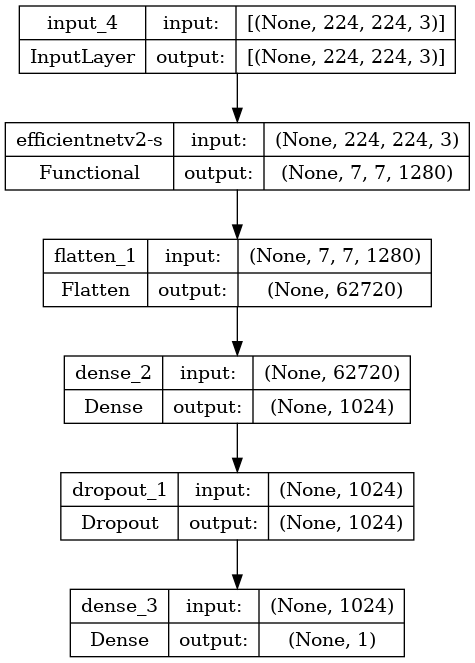

In [17]:
tf.keras.utils.plot_model(best_model, show_shapes=True)

### Train the Final Model with Best Hyperparameters and Save Training History

In this code the final model is trained using the best hyperparameters obtained from the hyperparameter tuning process. The training history is also saved for future reference.

#### Train the Final Model

- The `best_model` refers to the model architecture with the best hyperparameters obtained from the tuning process.

- The `fit` method is used to train the model with the following parameters:
    - `train_images`: Training data, typically loaded from images.
    - `validation_data=val_images`: Validation data, which is used to monitor model performance during training.
    - `class_weight=class_weight_dict_balanced`: Class weights are used to handle imbalanced datasets.
    - `epochs=50`: The number of training epochs (adjust as needed).
    - `callbacks=[callbacks]`: Callbacks are used for various purposes, such as early stopping or logging.

#### Save Training History

- The training history, including metrics like loss and accuracy, is saved for future reference. The history is typically saved in a binary format using the `pickle` module.

- The `history.history` dictionary contains the training metrics, and it is saved to a file named "Detector_training_history.pkl".

This code block is important for training and documenting the final model with the best hyperparameters. The saved training history can be used for visualization and analysis.

In [18]:

history = best_model.fit(train_images, validation_data=val_images,class_weight=class_weight_dict_balanced, epochs=50, callbacks=[callbacks])

import pickle
with open('Detector_training_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Epoch 1/50
61/61 [==============================] - 46s 458ms/step - loss: 0.3324 - binary_accuracy: 0.8336 - precision: 0.9639 - recall: 0.8207 - auc: 0.9371 - f1_score: 0.8865 - val_loss: 0.2106 - val_binary_accuracy: 0.9129 - val_precision: 0.9913 - val_recall: 0.8978 - val_auc: 0.9828 - val_f1_score: 0.9423
Epoch 2/50
61/61 [==============================] - 22s 353ms/step - loss: 0.1874 - binary_accuracy: 0.9186 - precision: 0.9914 - recall: 0.9051 - auc: 0.9766 - f1_score: 0.9463 - val_loss: 0.1605 - val_binary_accuracy: 0.9409 - val_precision: 0.9916 - val_recall: 0.9332 - val_auc: 0.9851 - val_f1_score: 0.9615
Epoch 3/50
61/61 [==============================] - 22s 350ms/step - loss: 0.1606 - binary_accuracy: 0.9264 - precision: 0.9894 - recall: 0.9169 - auc: 0.9820 - f1_score: 0.9518 - val_loss: 0.1847 - val_binary_accuracy: 0.9176 - val_precision: 0.9957 - val_recall: 0.8998 - val_auc: 0.9857 - val_f1_score: 0.9453
Epoch 4/50
61/61 [==============================] - 23s 370ms

### Saving Best Trial Results to a CSV File

In this code  the best trial results from the hyperparameter tuning process are saved to a CSV file for documentation and analysis.

#### Get the Best Trial

- The `best_trial` variable is used to obtain the best trial from the hyperparameter tuning process. This trial represents the set of hyperparameters that achieved the highest objective value.

#### Prepare Data for CSV

- Data is prepared in a tabular format for the CSV file. It includes information such as the best trial ID, the objective value (score), and the hyperparameters used in the best trial.

- A list named `data` is created to store this tabular data.

#### Write Data to CSV File

- The `csv` module is used to write the tabular data to a CSV file named "best_trial_results.csv."

- The `with` statement ensures that the file is properly opened and closed. The data is written row by row using the `writer.writerows(data)` method.

This code block is essential for documenting the best trial results, including hyperparameter values and their corresponding objective value (score). The resulting CSV file can be used for reference and reporting.


In [19]:
import csv


best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]


data = [
    ["Best Trial ID", best_trial.trial_id],
    ["Score (Objective Value)", best_trial.score]
]

for key, value in best_trial.hyperparameters.values.items():
    data.append([key, value])


with open('best_trial_results.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

### Model Evaluator

The following code defines a `ModelEvaluator` class for evaluating machine learning models and visualizing their performance.

#### Initialization

- The `ModelEvaluator` class is initialized with the following parameters:
  - `history`: Training history of the model.
  - `classes`: A list of class labels.
  - `model`: The machine learning model to be evaluated.
  - `test`: The test dataset for evaluation.
  - `threshold`: A threshold for classification.

#### `__plot_metric` Method

- This private method is used to plot training and validation metrics over epochs.
- It takes an `ax` object, a metric name, and two metric names for training and validation.
- The method plots the training and validation metrics and labels the axes accordingly.

#### `training_history` Method

- This method visualizes training history by plotting key metrics.
- It creates subplots for loss, binary accuracy, AUC, and precision.
- The history of these metrics during training and validation is plotted.
- The figure title and layout are configured for clarity.

#### `__clip_sigmoid_output` Method

- This private method clips sigmoid output to binary predictions based on the specified threshold.

#### `predict` Method

- The `predict` method generates model predictions using the test dataset.
- The sigmoid output is clipped to binary values using the defined threshold.

#### `class_report` Method

- This method generates a confusion matrix heatmap and a classification report.
- It uses TensorFlow to create the confusion matrix and seaborn to visualize it.
- The `classification_report` function from scikit-learn is used to display precision, recall, F1-score, and support for each class.

The `ModelEvaluator` class is a helpful tool for evaluating and visualizing the performance of machine learning models, particularly in binary classification tasks.


In [20]:

class ModelEvaluator:
    def __init__(self, history, classes : list, model, test, threshold : float):
        self.history = history
        self.model = model
        self.test = test
        self.classes = classes
        self.num_classes = len(self.classes)
        self.predictions = None
        self.t = threshold
    

    def __plot_metric(self, ax, metric: str,train_metric : str, val_metric : str):
        
        ax.plot(self.history.history[train_metric])
        ax.plot(self.history.history[val_metric])
        ax.title.set_text(train_metric + " v/s " + val_metric)
        ax.set_xlabel('Epochs')
        ax.set_ylabel(metric.title())
        ax.legend(['Train','Val'])
    

    def training_history(self):
        rows = 2
        columns = 2
        c = 0
        metrics = ["loss", "binary_accuracy", "auc",  "precision"]
        fig, axs = plt.subplots(rows, columns,figsize=(15,15))
        for metric in metrics:
            self.__plot_metric(axs[c//columns, c%columns], 
                               metric.replace("_", " ").title(), 
                               metric, "val_"+metric)
            c += 1
        fig.suptitle("Training History of the Model")
        plt.subplots_adjust(bottom=0.1, top=0.9, 
                            hspace=0.5)
        plt.show()

    def __clip_sigmoid_output(self, p : float):
        if p >= self.t:
            return 1
        else:
            return 0
    
    def predict(self):
        self.predictions = self.model.predict(self.test).flatten()
        self.predictions = list(map(self.__clip_sigmoid_output, 
                                    self.predictions))
    

    def class_report(self):
        sns.heatmap(tf.math.confusion_matrix(self.test.labels, 
                                             self.predictions, 
                                             num_classes=2), 
                    annot=True, cmap="crest")
        print(classification_report(self.test.labels, 
                                    self.predictions, 
                                    target_names=self.classes))

In [21]:
me = ModelEvaluator(history, ["Not Infected", "Infected"], best_model, test_images, 0.5)

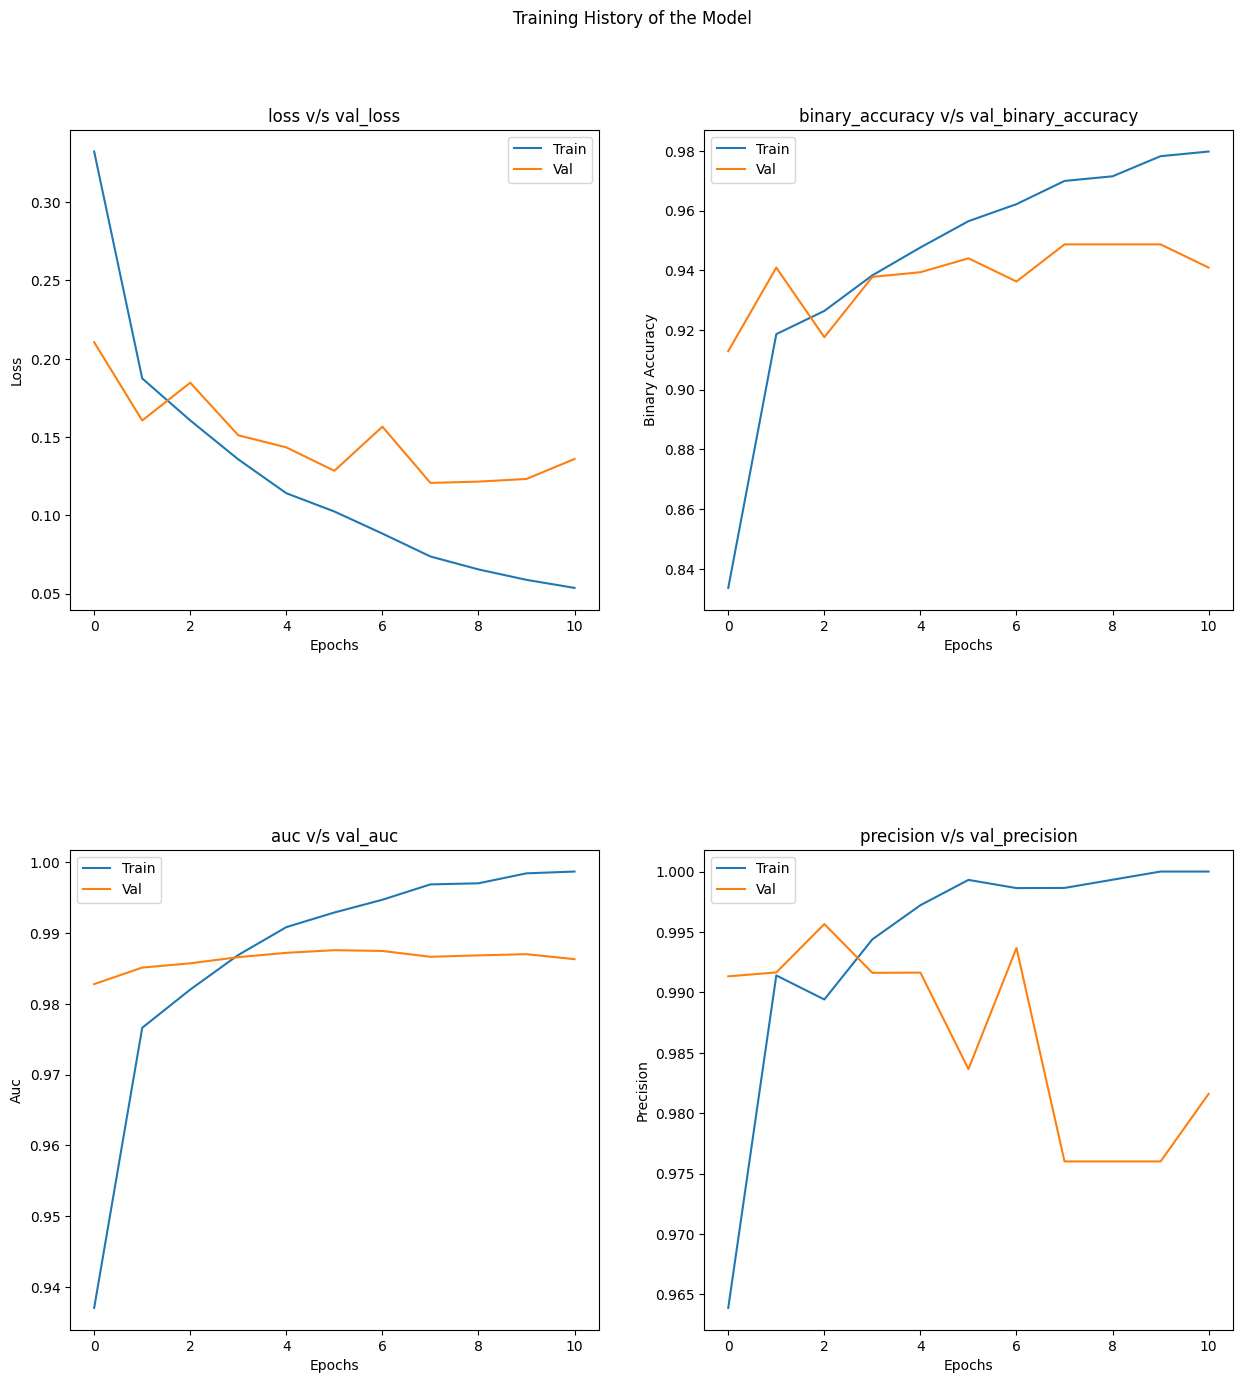

21/21 [==============================] - 10s 315ms/step


In [22]:
me.training_history()
me.predict()

              precision    recall  f1-score   support

Not Infected       0.87      0.95      0.91       134
    Infected       0.99      0.96      0.97       509

    accuracy                           0.96       643
   macro avg       0.93      0.96      0.94       643
weighted avg       0.96      0.96      0.96       643



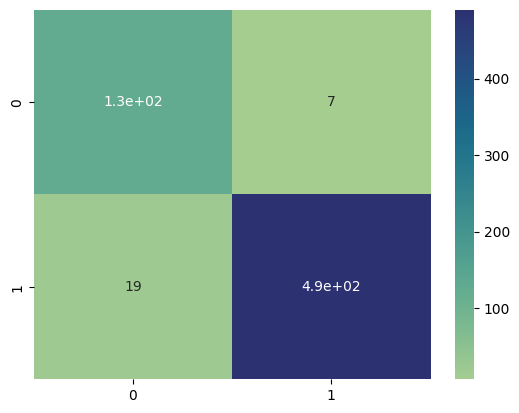

In [23]:
from sklearn.metrics import classification_report
me.class_report()

### Model Evaluation and Metrics Recording

In this code  a trained model's performance is evaluated, and various metrics are recorded.

#### Model Evaluation

- The `best_model` is evaluated using the `test_images` dataset, which contains the test data.

- The `evaluate` function is used to obtain metrics such as accuracy, loss, AUC, precision, and more.

#### Metrics Recording

- A `metrics_dict` is created to store the model's metrics. It contains metric names as keys and their corresponding results from the evaluation.

- The `metrics_dict` is transformed into a DataFrame named `df_metrics`. This DataFrame is structured with metrics as the index and metric values under the "Value" column.

- The code specifies the path for saving the metrics in a CSV file named "EfficientNetV2s_metrics.csv," located within the Kaggle working directory.

- Finally, the `df_metrics` DataFrame is saved to the CSV file using the `to_csv` method.

This code is valuable for evaluating a trained model and recording crucial metrics, simplifying the analysis and comparison of various models or model variations.


In [26]:
results = best_model.evaluate(test_images)

metrics_dict = dict(zip(best_model.metrics_names, results))

df_metrics = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Value'])

csv_path = "/kaggle/working/EfficientNetV2s_metrics.csv"
df_metrics.to_csv(csv_path)
csv_path

21/21 [==============================] - 5s 222ms/step - loss: 0.1096 - binary_accuracy: 0.9596 - precision: 0.9859 - recall: 0.9627 - auc: 0.9882 - f1_score: 0.9742


'/kaggle/working/EfficientNetV2s_metrics.csv'

In [27]:
model_save_path = 'dectectorEfficientNetV2s.h5'

# Save the model to the specified path
best_model.save(model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to dectectorEfficientNetV2s.h5
